In [120]:
from abc import ABC, abstractmethod

class MnistClassifierInterface(ABC):
    @abstractmethod
    def train(self, X, y):
        # method for training
        pass

    @abstractmethod
    def predict(self, X):
        # method for prediction
        pass

In [121]:
# from .MnistClassifierInterface import MnistClassifierInterface

from sklearn.ensemble import RandomForestClassifier
import numpy as np

class RandomForestMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    def train(self, X, y):
        X = X.reshape(X.shape[0], -1)
        self.model.fit(X, y)

    def predict(self, X_test):
        X_test = X_test.reshape(X_test.shape[0], -1)
        return self.model.predict(X_test)


In [122]:
# from .MnistClassifierInterface import MnistClassifierInterface

import tensorflow as tf
# from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

import numpy as np

class FeedForwardNNClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Flatten(input_shape=(28, 28)),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])
        
    def train(self, X, y):
        X = X.reshape(-1, 28, 28, 1).astype('float32') # / 255.0
        y = to_categorical(y, 10)
        
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1)
        
    def predict(self, X_test):
        X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') # / 255.0
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=-1)


In [123]:
# from .MnistClassifierInterface import MnistClassifierInterface

import tensorflow as tf
# from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

import numpy as np

class ConvolutionalNNClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = tf.keras.models.Sequential([
            Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
            MaxPooling2D(pool_size=(2,2)),

            Conv2D(64, kernel_size=(3,3), activation='relu'),
            MaxPooling2D(pool_size=(2,2)),

            Flatten(),
            Dense(128),
            Dense(10, activation='softmax')
        ])
        
    def train(self, X, y):
        X = X.reshape(-1, 28, 28, 1).astype('float32') # / 255.0
        y = to_categorical(y, 10)
        
        self.model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10)
        
    def predict(self, X_test):
        X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') # / 255.0
        predictions = self.model.predict(X_test)
        return np.argmax(predictions, axis=-1)


In [124]:
class MnistClassifier:
    def __init__(self, algorithm="rf"):
        # makes model depending on algorithm
        if algorithm == "rf":
            self.classifier = RandomForestMnistClassifier()
        elif algorithm == "nn":
            self.classifier = FeedForwardNNClassifier()
        elif algorithm == "cnn":
            self.classifier = ConvolutionalNNClassifier()
        else:
            raise ValueError(
                "Possible algorithms:\n"
                "'rf' - Random Forest\n"
                "'nn' - Feed Forward Neural Network\n"
                "'cnn' - Convolutional Neural Network"
            )
    def train(self, X, y):
        self.classifier.train(X, y)

    def predict(self, X_test):
        predictions = self.classifier.predict(X_test)
        return predictions

In [125]:
# check models

from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

mnist_rf = MnistClassifier(algorithm="rf")
mnist_rf.train(X_train, y_train)
y_pred_rf = mnist_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

mnist_nn = MnistClassifier(algorithm="nn")
mnist_nn.train(X_train, y_train)
y_pred_nn = mnist_nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

mnist_cnn = MnistClassifier(algorithm="cnn")
mnist_cnn.train(X_train, y_train)
y_pred_cnn = mnist_cnn.predict(X_test)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)

print()
print(f"Random Forest Accuracy on MNIST: {accuracy_rf:.4f}")
print(f"Feed Forward Neural Network Accuracy on MNIST: {accuracy_nn:.4f}")
print(f"Convolutional Neural Network on MNIST: {accuracy_cnn:.4f}")

Epoch 1/10


2025-02-20 22:55:55.337279: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:55.376108: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:55.390847: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:55.413435: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:55.422273: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:55.426367: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


  55/1688 [..............................] - ETA: 4s - loss: 1.1284 - accuracy: 0.6852

2025-02-20 22:55:55.900091: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1683/1688 [============================>.] - ETA: 0s - loss: 0.2726 - accuracy: 0.9216

2025-02-20 22:55:59.754070: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:59.766598: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:59.775918: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:59.782170: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:59.787707: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:59.791423: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:55:59.875217: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1688/1688 [==============================] - 5s 2ms/step - loss: 0.2722 - accuracy: 0.9217 - val_loss: 0.1325 - val_accuracy: 0.9627
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9644 - val_loss: 0.0996 - val_accuracy: 0.9728


2025-02-20 22:56:03.811881: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:03.816672: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:03.820307: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9749 - val_loss: 0.0767 - val_accuracy: 0.9777
Epoch 4/10


2025-02-20 22:56:07.746210: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:07.751163: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:07.754804: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1668/1688 [============================>.] - ETA: 0s - loss: 0.0620 - accuracy: 0.9815

2025-02-20 22:56:11.659069: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:11.663820: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:11.667551: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1688/1688 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9814 - val_loss: 0.0717 - val_accuracy: 0.9777
Epoch 5/10
1683/1688 [============================>.] - ETA: 0s - loss: 0.0476 - accuracy: 0.9853

2025-02-20 22:56:15.610783: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:15.615647: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:15.620101: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1688/1688 [==============================] - 4s 2ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0718 - val_accuracy: 0.9787


2025-02-20 22:56:19.587476: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:19.592121: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:19.595731: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0771 - val_accuracy: 0.9790
Epoch 8/10


2025-02-20 22:56:23.554895: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:23.559611: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:23.563236: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1688/1688 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0804 - val_accuracy: 0.9802
Epoch 9/10
   1/1688 [..............................] - ETA: 6s - loss: 0.0059 - accuracy: 1.0000

2025-02-20 22:56:27.508786: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:27.513531: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:27.517278: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1688/1688 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0784 - val_accuracy: 0.9803


2025-02-20 22:56:31.534854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:31.540128: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:31.543757: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


Epoch 10/10
1674/1688 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9957

2025-02-20 22:56:35.452259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:35.457012: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:35.460674: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


104/313 [========>.....................] - ETA: 0s

2025-02-20 22:56:35.917690: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:35.932130: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:35.944116: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:35.955689: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:35.961429: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:35.964931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:35.993260: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


313/313 [==============================] - 0s 1ms/step
Epoch 1/10


2025-02-20 22:56:37.400994: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:37.416646: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:37.433236: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:37.455460: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:37.460638: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 22:56:37.464279: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


   5/1875 [..............................] - ETA: 57s - loss: 2.2592 - accuracy: 0.2250    

2025-02-20 22:56:38.114944: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


1875/1875 [==============================] - 31s 16ms/step - loss: 0.1169 - accuracy: 0.9646
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0438 - accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0330 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0264 - accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0204 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0124 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0106 - accuracy: 0.9964
Epoch 10/10
 24/313 [=>............................] - ETA: 1s

2025-02-20 23:01:38.043118: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:38.056166: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:38.064142: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:38.072999: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:38.078354: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:38.081518: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:38.120535: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


313/313 [==============================] - 1s 4ms/step

Random Forest Accuracy on MNIST: 0.9704
Feed Forward Neural Network Accuracy on MNIST: 0.9766
Convolutional Neural Network on MNIST: 0.9896


In [126]:
# check with noisy data

def add_noise(images, noise_level=0.3):
    noise = np.random.normal(0, noise_level, images.shape)
    noisy_images = np.clip(images + noise, 0, 1)
    return noisy_images

X_test_noisy = add_noise(X_test)

# predict on noisy data
y_pred_noisy = mnist_rf.predict(X_test_noisy)
accuracy_rf_dist = accuracy_score(y_test, y_pred_noisy)

y_pred_noisy = mnist_nn.predict(X_test_noisy)
accuracy_nn_dist = accuracy_score(y_test, y_pred_noisy)

y_pred_noisy = mnist_cnn.predict(X_test_noisy)
accuracy_cnn_dist = accuracy_score(y_test, y_pred_noisy)

print()
print(f"Random Forest Accuracy on noisy MNIST: {accuracy_rf_dist:.4f}")
print(f"Feed Forward Neural Network Accuracy on noisy MNIST: {accuracy_nn_dist:.4f}")
print(f"Convolutional Neural Network on noisy MNIST: {accuracy_cnn_dist:.4f}")

150/313 [=============>................] - ETA: 0s

2025-02-20 23:01:40.045882: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.057260: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.064055: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.070294: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.075693: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.078933: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


 24/313 [=>............................] - ETA: 1s

2025-02-20 23:01:40.578611: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.591531: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.598487: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.607130: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.612133: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:40.615335: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


313/313 [==============================] - 1s 4ms/step

Random Forest Accuracy on noisy MNIST: 0.5717
Feed Forward Neural Network Accuracy on noisy MNIST: 0.6472
Convolutional Neural Network on noisy MNIST: 0.9129


In [127]:
# test with inverted colors

X_test_inverted = 1 - X_test

print("Testing on inverted images:")
y_pred_in = mnist_rf.predict(X_test_inverted)
accuracy_rf_inv = accuracy_score(y_test, y_pred_in)

y_pred_in = mnist_nn.predict(X_test_inverted)
accuracy_nn_inv = accuracy_score(y_test, y_pred_in)

y_pred_in = mnist_cnn.predict(X_test_inverted)
accuracy_cnn_inv = accuracy_score(y_test, y_pred_in)

print()
print(f"Random Forest Accuracy on noisy MNIST: {accuracy_rf_inv:.4f}")
print(f"Feed Forward Neural Network Accuracy on noisy MNIST: {accuracy_nn_inv:.4f}")
print(f"Convolutional Neural Network on noisy MNIST: {accuracy_cnn_inv:.4f}")

Testing on inverted images:
151/313 [=============>................] - ETA: 0s

2025-02-20 23:01:42.241664: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.254263: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.262392: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.271194: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.277063: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.280645: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


 41/313 [==>...........................] - ETA: 1s

2025-02-20 23:01:42.796540: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.806396: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.813007: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.818924: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.823875: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:42.827024: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


313/313 [==============================] - 1s 4ms/step

Random Forest Accuracy on noisy MNIST: 0.0122
Feed Forward Neural Network Accuracy on noisy MNIST: 0.0490
Convolutional Neural Network on noisy MNIST: 0.4599


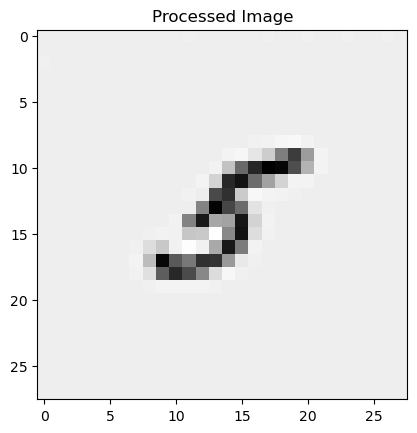

With Random Forest -> predicted number: [8]
1/1 [==============================] - 0s 15ms/step
With Random Feed Forward Neural Network -> predicted number: [5]
1/1 [==============================] - 0s 16ms/step
With Convolutional Neural Network File -> predicted number: [9]


2025-02-20 23:01:44.354251: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.367720: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.383250: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.398662: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.403524: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.406624: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.419525: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.436415: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.444536: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44

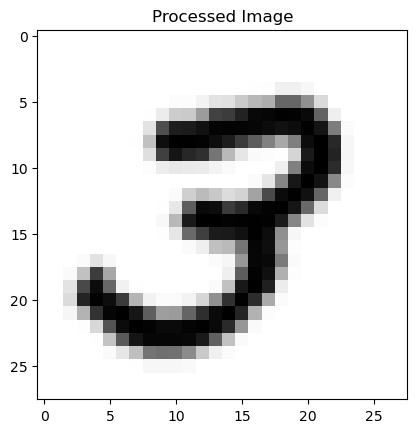

With Random Forest -> predicted number: [6]
1/1 [==============================] - 0s 17ms/step
With Random Feed Forward Neural Network -> predicted number: [5]
1/1 [==============================] - 0s 17ms/step
With Convolutional Neural Network File -> predicted number: [5]


2025-02-20 23:01:44.581720: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.595437: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.603628: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.609548: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.614390: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.618744: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.633996: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.648134: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.655614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44

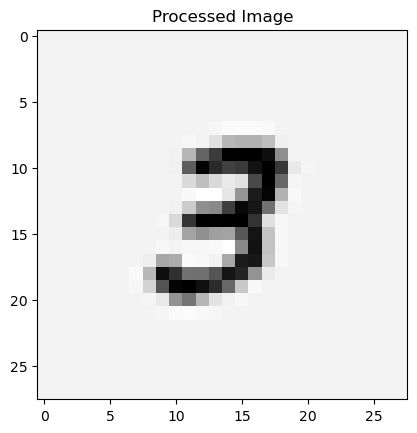

With Random Forest -> predicted number: [8]
1/1 [==============================] - 0s 15ms/step
With Random Feed Forward Neural Network -> predicted number: [5]
1/1 [==============================] - 0s 16ms/step
With Convolutional Neural Network File -> predicted number: [9]


2025-02-20 23:01:44.789068: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.804432: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.812799: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.819391: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.824045: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.827187: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.839151: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.863852: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44.871096: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2025-02-20 23:01:44

In [128]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = Image.open(image_path).convert("L")
    img = img.resize((28, 28))
    img = np.array(img)
    img = 255 - img
    
    plt.imshow(img, cmap="gray")
    plt.title("Processed Image")
    plt.show()
    
    img = img.astype('float32') / 255.0
    img = img.reshape(1, 28, 28, 1)
    
    return img


def predict_images_from_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith((".png", ".jpg", ".jpeg"))]
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        
        img=preprocess_image(image_path)
        
        predicted_digit = mnist_rf.predict(img)
        print(f"With Random Forest -> predicted number: {predicted_digit}")
        
        predicted_digit = mnist_nn.predict(img)
        print(f"With Random Feed Forward Neural Network -> predicted number: {predicted_digit}")
        
        predicted_digit = mnist_cnn.predict(img)
        print(f"With Convolutional Neural Network File -> predicted number: {predicted_digit}")
        
folder_path = "test-numbers"
predict_images_from_folder(folder_path)

# [mnist_rf, mnist_nn, mnist_cnn], 

